In [1]:
import pandas as pd
import numpy as np

from statistics import stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns


# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay




%run ../all_studies/us_common_functions.ipynb






#########################################
window_size=10
overlappping_window=False
#########################################




data_dir = '../../data/office_tasks/'
fig_dir = '../../figure/office_tasks/'





In [2]:
df = pd.read_csv(data_dir + 'data_2.csv')
df.head()

,Subject,Treatment,Perinasal,Palm,Breathing,Heart,Age,Gender,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA Total Sum
0,3,RB,0.003544,0.311345,12.2,83.0,23.0,Female,17.142857,14.285714,17.142857,14.285714,17.142857,14.285714,94.285714
1,3,RB,0.003543,0.310063,12.8,82.0,23.0,Female,17.142857,14.285714,17.142857,14.285714,17.142857,14.285714,94.285714
2,3,RB,0.003541,0.309743,12.8,81.0,23.0,Female,17.142857,14.285714,17.142857,14.285714,17.142857,14.285714,94.285714
3,3,RB,0.003539,0.309743,13.3,79.0,23.0,Female,17.142857,14.285714,17.142857,14.285714,17.142857,14.285714,94.285714
4,3,RB,0.003537,0.309743,13.3,82.0,23.0,Female,17.142857,14.285714,17.142857,14.285714,17.142857,14.285714,94.285714


In [3]:
df.columns

Index(['Subject', 'Treatment', 'Perinasal', 'Palm', 'Breathing', 'Heart',
       'Age', 'Gender', 'Mental Demand', 'Physical Demand', 'Temporal Demand',
       'Performance', 'Effort', 'Frustration', 'NASA Total Sum'],
      dtype='object')

In [4]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
print(df.Subject.unique())

Total Subjects: 63
[  3   5   9  11  16  19  21  31  32  35  37  46  47  51  61  63  64  65
  66  68  77  78  79  82  83  84  85  91  92  93  94  96  98  99 106 112
 113 114 121 122 124 126 128 130 132 138 139 141 144 145 151 152 154 156
 157 162 166 172 173 174 175 176 178]


# Creating csv for additional plots for paper -->

In [5]:
df['TimeElapsed'] = df.groupby(['Subject', 'Treatment']).cumcount()+1
df.head()


plot_df = df.copy()
plot_df.to_csv(data_dir + "data_2.1.csv", sep=',', index=False)





plot_df['Perinasal_Log'] = np.log(plot_df['Perinasal'])


def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(plot_df.shape)
plot_df = quality_control_phase1(plot_df, 'Heart', 40, 140)
plot_df = quality_control_phase1(plot_df, 'Breathing', 4, 40)
print(plot_df.shape)


plot_df.to_csv(data_dir + "data_2.2.csv", sep=',', index=False)

(249033, 17)
(191693, 17)


In [6]:
# CHECK NA/Null
df.isnull().sum()

Subject                 0
Treatment               0
Perinasal            7092
Palm               134157
Breathing           31189
Heart               38719
Age                  8177
Gender               8177
Mental Demand        8177
Physical Demand      8177
Temporal Demand      8177
Performance          8177
Effort               8177
Frustration          8177
NASA Total Sum       8177
TimeElapsed             0
dtype: int64

In [7]:
df.drop('Palm', axis=1, inplace=True)
df.isnull().sum()

Subject                0
Treatment              0
Perinasal           7092
Breathing          31189
Heart              38719
Age                 8177
Gender              8177
Mental Demand       8177
Physical Demand     8177
Temporal Demand     8177
Performance         8177
Effort              8177
Frustration         8177
NASA Total Sum      8177
TimeElapsed            0
dtype: int64

In [8]:
print(df.Treatment.unique())
df = df[df['Treatment'].isin(['RB', 'DT'])]
print(df.Treatment.unique())

['RB' 'ST' 'PM' 'DT' 'PR']
['RB' 'DT']


In [9]:
df.isnull().sum()

Subject                0
Treatment              0
Perinasal           5516
Breathing          27964
Heart              30951
Age                 6490
Gender              6490
Mental Demand       6490
Physical Demand     6490
Temporal Demand     6490
Performance         6490
Effort              6490
Frustration         6490
NASA Total Sum      6490
TimeElapsed            0
dtype: int64

In [10]:
df[df.Effort.isnull()].Subject.unique()

array([82, 96])

In [11]:
def get_range(df, col):
    return [df[col].min(), df[col].max()]

print(get_range(df, 'Perinasal'))
print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))


[0.0024157914255687, 0.0332347613419816]
[41.0, 119.0]
[4.0, 36.1]


In [12]:
def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(df.shape)
df = quality_control_phase1(df, 'Heart', 40, 140)
df = quality_control_phase1(df, 'Breathing', 4, 40)
print(df.shape)

print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))

(200536, 15)
(151936, 15)
[41.0, 119.0]
[4.0, 36.1]


In [13]:
df['Perinasal_Log'] = np.log(df['Perinasal'])

In [14]:
def get_mean(df, col_name):
    return df.groupby(['Subject', 'Treatment'])[col_name].transform('mean')

def get_baseline_mean(df, col_name):
    return df[col_name].iloc[0]

In [15]:
df['PP_Mean'] = get_mean(df, 'Perinasal_Log')
df['HR_Mean'] = get_mean(df, 'Heart')
df['BR_Mean'] = get_mean(df, 'Breathing')

In [16]:
grouped_df = df.groupby(['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean'], as_index = False)['TimeElapsed'].count()
rb_df = grouped_df[(grouped_df.Treatment == 'RB')][['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean']]
rb_df.rename(columns = {
            'PP_Mean': 'PP_RB_Mean',
            'HR_Mean': 'HR_RB_Mean',
            'BR_Mean': 'BR_RB_Mean',}, inplace=True)
rb_df.to_csv(data_dir + 'rb_data.csv', sep=',')

In [17]:
df.Subject.unique()

array([  3,  11,  16,  19,  31,  32,  35,  46,  47,  51,  61,  63,  64,
        65,  66,  68,  77,  78,  79,  82,  83,  84,  85,  91,  92,  93,
        94,  96,  98,  99, 106, 112, 113, 114, 121, 122, 124, 128, 132,
       138, 139, 141, 144, 151, 152, 154, 156, 157, 166, 172, 173, 174,
       175, 176])

In [18]:
df_arousal = pd.DataFrame()

for subj in df['Subject'].unique():
    subj_df = df.copy()[df.Subject == subj]
    rd_df = subj_df.copy()[subj_df.Treatment == 'RB']
    
    if rd_df.shape[0]:  # If there is any row for Resting Baseline
        subj_df['PP_Normalized'] = subj_df.Perinasal_Log - get_baseline_mean(rd_df, 'PP_Mean')
        subj_df['HR_Normalized'] = subj_df.Heart - get_baseline_mean(rd_df, 'HR_Mean')
        subj_df['BR_Normalized'] = subj_df.Breathing - get_baseline_mean(rd_df, 'BR_Mean')

        df_arousal = df_arousal.append(subj_df)
    
df_arousal.columns

Index(['Subject', 'Treatment', 'Perinasal', 'Breathing', 'Heart', 'Age',
       'Gender', 'Mental Demand', 'Physical Demand', 'Temporal Demand',
       'Performance', 'Effort', 'Frustration', 'NASA Total Sum', 'TimeElapsed',
       'Perinasal_Log', 'PP_Mean', 'HR_Mean', 'BR_Mean', 'PP_Normalized',
       'HR_Normalized', 'BR_Normalized'],
      dtype='object')

In [19]:
print_row_count(df_arousal, 'Treatment')


# Removing 'RB' from dataset, as 'RB' will not be included in the model
print(df_arousal.shape, df_arousal.Treatment.unique())
df_arousal = df_arousal[~df_arousal.Treatment.isin(['RB'])]
print(df_arousal.shape, df_arousal.Treatment.unique())


print_row_count(df_arousal, 'Treatment')

           Treatment
Treatment           
DT            137403
RB             11533 

(148936, 22) ['RB' 'DT']
(137403, 22) ['DT']
           Treatment
Treatment           
DT            137403 



In [20]:
df.shape

(151936, 19)

In [21]:
df_arousal.isnull().sum()

Subject               0
Treatment             0
Perinasal          3613
Breathing             0
Heart                 0
Age                6002
Gender             6002
Mental Demand      6002
Physical Demand    6002
Temporal Demand    6002
Performance        6002
Effort             6002
Frustration        6002
NASA Total Sum     6002
TimeElapsed           0
Perinasal_Log      3613
PP_Mean               0
HR_Mean               0
BR_Mean               0
PP_Normalized      3613
HR_Normalized         0
BR_Normalized         0
dtype: int64

-----------------------------------------
# Remove the NA rows for PP, HR and BR
-----------------------------------------

In [22]:
print(df_arousal.shape, str(len(df_arousal.Subject.unique())))
df_arousal.dropna(inplace=True)
print(df_arousal.shape, str(len(df_arousal.Subject.unique())))

(137403, 22) 46
(127800, 22) 44


In [23]:
df_arousal.isnull().sum()

Subject            0
Treatment          0
Perinasal          0
Breathing          0
Heart              0
Age                0
Gender             0
Mental Demand      0
Physical Demand    0
Temporal Demand    0
Performance        0
Effort             0
Frustration        0
NASA Total Sum     0
TimeElapsed        0
Perinasal_Log      0
PP_Mean            0
HR_Mean            0
BR_Mean            0
PP_Normalized      0
HR_Normalized      0
BR_Normalized      0
dtype: int64

In [24]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
unique_subjs = df.Subject.unique()
print(unique_subjs)
print('\n')


print('After removing NA rows, Total Subjects: ' + str(len(df_arousal.Subject.unique())))
unique_subjs = df_arousal.Subject.unique()
print(unique_subjs)

Total Subjects: 54
[  3  11  16  19  31  32  35  46  47  51  61  63  64  65  66  68  77  78
  79  82  83  84  85  91  92  93  94  96  98  99 106 112 113 114 121 122
 124 128 132 138 139 141 144 151 152 154 156 157 166 172 173 174 175 176]


After removing NA rows, Total Subjects: 44
[  3  11  16  19  32  46  61  63  64  65  66  68  77  79  83  84  85  91
  92  93  94  98  99 106 112 114 121 122 124 128 132 138 139 141 151 152
 154 156 157 166 172 173 174 175]


In [25]:
def get_mean(df, col_name):
    return df[col_name].mean() 

def get_sd(df, col_name):
    return stdev(df[col_name])

def convert_str(num):
    return(str(round(num, 2)))

def print_mean_sd_stress_marker(signal, mean, sd, stress_marker): 
    print(signal + ":\t" + convert_str(mean) + u" \u00B1 " + convert_str(sd) 
          + "\tstress_marker: " + convert_str(stress_marker))


In [26]:
############################################################################################
pp_diff_mean = get_mean(df_arousal, 'PP_Normalized')
pp_diff_sd = get_sd(df_arousal, 'PP_Normalized')

pp_stress_marker = pp_diff_mean + 0.5*pp_diff_sd

df_arousal.loc[df_arousal.PP_Normalized < pp_stress_marker, 'PP_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_stress_marker, 'PP_Arousal'] = 'stressed'
############################################################################################



############################################################################################
pp_2_stress_marker = pp_diff_mean

df_arousal.loc[df_arousal.PP_Normalized < pp_2_stress_marker, 'PP_Arousal_2'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_2_stress_marker, 'PP_Arousal_2'] = 'stressed'
############################################################################################




############################################################################################
hr_diff_mean = get_mean(df_arousal, 'HR_Normalized')
hr_diff_sd = get_sd(df_arousal, 'HR_Normalized')

hr_stress_marker = 0

df_arousal.loc[df_arousal.HR_Normalized < hr_stress_marker, 'HR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.HR_Normalized >= hr_stress_marker, 'HR_Arousal'] = 'stressed'
############################################################################################




############################################################################################
br_diff_mean = get_mean(df_arousal, 'BR_Normalized')
br_diff_sd = get_sd(df_arousal, 'BR_Normalized')

br_stress_marker = 0

df_arousal.loc[df_arousal.BR_Normalized < br_stress_marker, 'BR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.BR_Normalized >= br_stress_marker, 'BR_Arousal'] = 'stressed'
############################################################################################

    
    
############################################################################################
print_mean_sd_stress_marker('PP', pp_diff_mean, pp_diff_sd, pp_stress_marker)
print_mean_sd_stress_marker('PP_2', pp_diff_mean, pp_diff_sd, pp_2_stress_marker)
print_mean_sd_stress_marker('HR', hr_diff_mean, hr_diff_sd, hr_stress_marker)
print_mean_sd_stress_marker('BR', br_diff_mean, br_diff_sd, br_stress_marker)
############################################################################################

# ############################################################################################
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_stress_marker, 2))
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_2_stress_marker, 2))
# print(round(hr_diff_mean, 2), round(hr_diff_sd, 2), round(hr_stress_marker, 2))
# print(round(br_diff_mean, 2), round(br_diff_sd, 2), round(br_stress_marker, 2))
# ############################################################################################



# 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'

PP:	0.12 ± 0.15	stress_marker: 0.2
PP_2:	0.12 ± 0.15	stress_marker: 0.12
HR:	-1.46 ± 8.31	stress_marker: 0
BR:	2.09 ± 4.6	stress_marker: 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


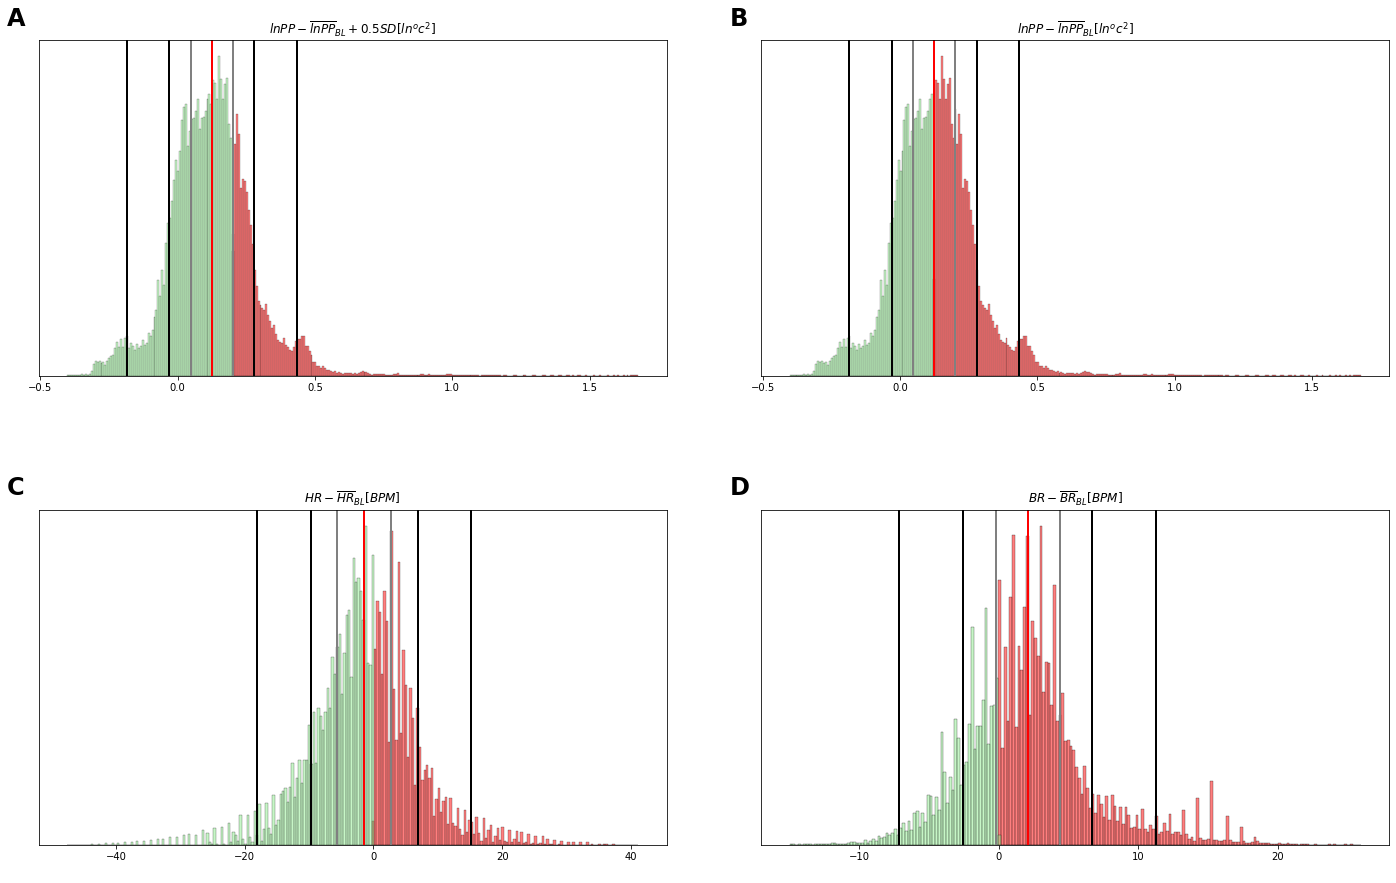

In [27]:
line_width = 2
palette ={"relaxed": "lightgreen", "stressed": "red"}


fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C', 'D')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    generate_arousal_extraction_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'ot_pp_br_hr_arousal_extraction.pdf', dpi=300, bbox_inches='tight')
plt.show()

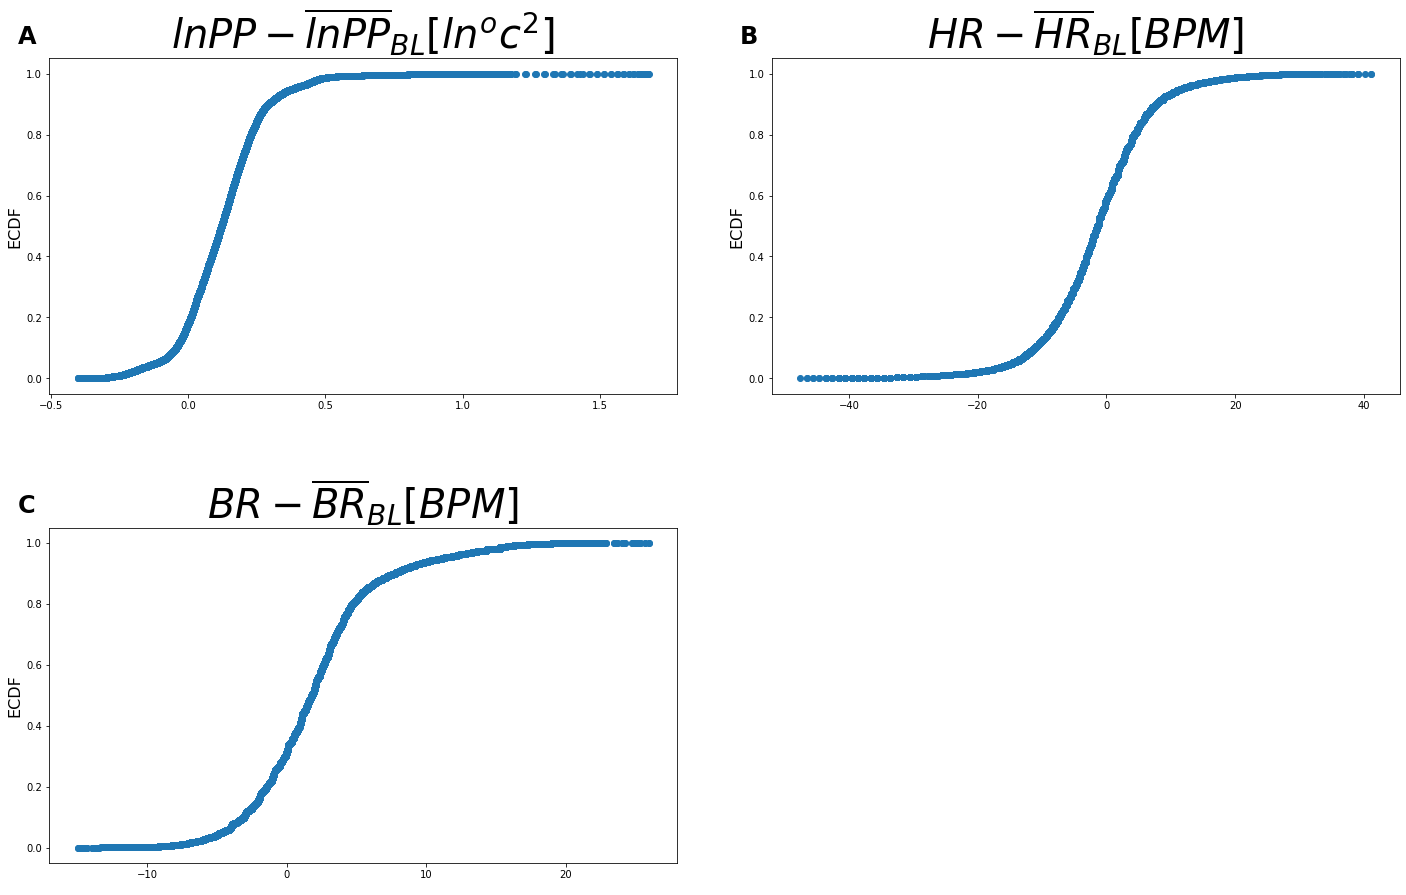

In [28]:
fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    df_arousal = generate_ecdf_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'ot_pp_br_hr_ecdf.png', dpi=300, bbox_inches='tight')
fig.savefig(fig_dir + 'ot_pp_br_hr_ecdf.pdf', dpi=300, bbox_inches='tight')
plt.show()   

In [29]:
signals = ['PP', 'HR', 'BR']
df_arousal = generate_ecdf_arousal_cols(df_arousal, signals)

                 PP_Arousal_ecdf
PP_Arousal_ecdf                 
neutral                     34.0
relaxed                     33.0
stressed                    33.0 

                 HR_Arousal_ecdf
HR_Arousal_ecdf                 
neutral                    33.85
relaxed                    33.00
stressed                   33.15 

                 BR_Arousal_ecdf
BR_Arousal_ecdf                 
neutral                    34.05
relaxed                    32.95
stressed                   33.00 

                    PP_HR_Arousal_ecdf
PP_HR_Arousal_ecdf                    
neutral                           51.1
relaxed                           24.2
stressed                          24.7 

                    PP_BR_Arousal_ecdf
PP_BR_Arousal_ecdf                    
neutral                          57.20
relaxed                          20.96
stressed                         21.84 

                    HR_BR_Arousal_ecdf
HR_BR_Arousal_ecdf                    
neutral                    

In [30]:
df_arousal.to_csv(data_dir + "data_2.5.csv", sep=',')
print(df_arousal.Treatment.unique())
print(df_arousal.columns)

['DT']
Index(['Subject', 'Treatment', 'Perinasal', 'Breathing', 'Heart', 'Age',
       'Gender', 'Mental Demand', 'Physical Demand', 'Temporal Demand',
       'Performance', 'Effort', 'Frustration', 'NASA Total Sum', 'TimeElapsed',
       'Perinasal_Log', 'PP_Mean', 'HR_Mean', 'BR_Mean', 'PP_Normalized',
       'HR_Normalized', 'BR_Normalized', 'PP_Arousal', 'PP_Arousal_2',
       'HR_Arousal', 'BR_Arousal', 'PP_ecdf', 'HR_ecdf', 'BR_ecdf',
       'PP_HR_ecdf', 'PP_BR_ecdf', 'HR_BR_ecdf', 'PP_HR_BR_ecdf',
       'PP_Arousal_ecdf', 'HR_Arousal_ecdf', 'BR_Arousal_ecdf',
       'PP_HR_Arousal_ecdf', 'PP_BR_Arousal_ecdf', 'HR_BR_Arousal_ecdf',
       'PP_HR_BR_Arousal_ecdf'],
      dtype='object')


In [31]:
final_df = get_non_overlapping_aggregrated_df(df_arousal)

Subject Processing: 
3
11
16
19
32
                 PP_Arousal_Mode
PP_Arousal_Mode                 
neutral                    50.20
relaxed                    11.67
stressed                   38.12 

                 HR_Arousal_Mode
HR_Arousal_Mode                 
neutral                    20.72
relaxed                    27.94
stressed                   51.35 

                 BR_Arousal_Mode
BR_Arousal_Mode                 
neutral                    20.85
relaxed                    57.76
stressed                   21.39 

                    PP_HR_Arousal_Mode
PP_HR_Arousal_Mode                    
neutral                          40.08
relaxed                          13.63
stressed                         46.29 

                    PP_BR_Arousal_Mode
PP_BR_Arousal_Mode                    
neutral                          61.47
relaxed                          24.97
stressed                         13.56 

                    HR_BR_Arousal_Mode
HR_BR_Arousal_Mode             

In [32]:
print_row_count(final_df, 'Treatment')

print(final_df.shape, final_df.Treatment.unique())
final_df = final_df[~final_df.Treatment.isin(['RB'])]
print(final_df.shape, final_df.Treatment.unique())


print(final_df.shape)
final_df = final_df.dropna()
print(final_df.shape)

print_row_count(final_df, 'Treatment')

           Treatment
Treatment           
DT              1482 

(1482, 31) ['DT']
(1482, 31) ['DT']
(1482, 31)
(1482, 31)
           Treatment
Treatment           
DT              1482 



In [33]:
final_df.isnull().sum()

Subject                  0
Treatment                0
Age                      0
Effort                   0
Frustration              0
Mental_Demand            0
Performance              0
Physical_Demand          0
Temporal_Demand          0
NASA_Total_Sum           0
PP_Arousal_Mode          0
HR_Arousal_Mode          0
BR_Arousal_Mode          0
PP_HR_Arousal_Mode       0
PP_BR_Arousal_Mode       0
HR_BR_Arousal_Mode       0
PP_HR_BR_Arousal_Mode    0
PP_Mean                  0
PP_Median                0
PP_SD                    0
PP_SS                    0
Hr_Mean                  0
Hr_Median                0
Hr_SD                    0
Hr_SS                    0
Br_Mean                  0
Br_Median                0
Br_SD                    0
Br_SS                    0
Gender_Female            0
Gender_Male              0
dtype: int64

In [34]:
final_df.to_csv(data_dir + "data_3.csv", sep=',', index=False)

-----------------------------------------------------
# This part is to get info for paper/report
-----------------------------------------------------

In [35]:
final_df = pd.read_csv(data_dir + "data_3.csv")
final_df.head()

,Subject,Treatment,Age,Effort,Frustration,Mental_Demand,Performance,Physical_Demand,Temporal_Demand,NASA_Total_Sum,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,PP_Mean,PP_Median,PP_SD,PP_SS,Hr_Mean,Hr_Median,Hr_SD,Hr_SS,Br_Mean,Br_Median,Br_SD,Br_SS,Gender_Female,Gender_Male
0,3,DT,23.0,17.142857,14.285714,17.142857,14.285714,14.285714,17.142857,94.285714,neutral,relaxed,relaxed,neutral,relaxed,relaxed,relaxed,0.132722,0.132768,0.007949,0.176720,-6.36595,-6.46595,1.370320,422.153171,-4.769928,-4.729928,1.009345,236.691161,1,0
1,3,DT,23.0,17.142857,14.285714,17.142857,14.285714,14.285714,17.142857,94.285714,neutral,relaxed,relaxed,neutral,relaxed,relaxed,relaxed,0.107029,0.106407,0.006930,0.114983,-7.36595,-7.46595,3.314949,641.472168,-2.799928,-2.729928,0.404969,79.871986,1,0
2,3,DT,23.0,17.142857,14.285714,17.142857,14.285714,14.285714,17.142857,94.285714,neutral,relaxed,relaxed,relaxed,relaxed,relaxed,relaxed,0.086558,0.086510,0.005469,0.075192,-7.66595,-7.96595,1.549193,609.267867,-2.339928,-2.379928,0.142984,54.936645,1,0
3,3,DT,23.0,17.142857,14.285714,17.142857,14.285714,14.285714,17.142857,94.285714,neutral,relaxed,relaxed,relaxed,relaxed,relaxed,relaxed,0.072455,0.072068,0.002871,0.052572,-6.96595,-7.46595,2.505549,541.744569,-1.689928,-1.829928,0.398469,29.987577,1,0
4,3,DT,23.0,17.142857,14.285714,17.142857,14.285714,14.285714,17.142857,94.285714,neutral,relaxed,relaxed,relaxed,relaxed,relaxed,relaxed,0.067545,0.067403,0.000387,0.045625,-7.46595,-7.46595,2.000000,593.404067,-0.289928,-0.279928,0.251440,1.409584,1,0


In [36]:
# final_df.groupby('Subject')['Gender_Male'].sum()

print("Male: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.ne(0).sum())))
print("Female: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.eq(0).sum())))

Male: 2
Female: 3


In [37]:
print(final_df.Age.min(), final_df.Age.max())

19.0 24.0


In [38]:
print("Total Subjects: " + str(len(final_df.Subject.unique())))
print("Total Data: " + str(final_df.shape[0]))

Total Subjects: 5
Total Data: 1482


In [39]:
# def get_non_overlapping_window_df(df_arousal):
#     window_df = pd.DataFrame()
    
#     print('Subject Processing: ')
#     for subj in df_arousal.Subject.unique():
#     # for subj in df_arousal.Subject.unique()[:1]:
#         print(subj)
        
#         for treatment in df_arousal.Treatment.unique():
#             subj_treatment_df = df_arousal.copy()[(df_arousal['Subject'] == subj) & (df_arousal['Treatment'] == treatment)]
#             # print(subj, treatment, len(subj_treatment_df))

#             i = 0
#             totalRows = subj_treatment_df.shape[0]
            
#             while i+2 < totalRows: # proceed for atleast 3 rows
#                 subj_treatment_window_df = subj_treatment_df.copy().iloc[i: min(totalRows, i+10)]
#                 i += 10
                
                
#                 subj_treatment_window_first_row = subj_treatment_window_df.iloc[0]
                
#                 temp_df = pd.DataFrame({'Subject': [subj], 
#                                         'Treatment': [treatment], 
#                                         'Gender': [subj_treatment_window_first_row.Gender],
#                                         'Age': [subj_treatment_window_first_row.Age],
# #                                         'STAI': [subj_treatment_window_first_row.STAI],
# #                                         'Type_AB': [subj_treatment_window_first_row.Type_AB],
# #                                         'Drive_Label': [subj_treatment_window_first_row.Drive_Label],
#                                         'Effort': [subj_treatment_window_first_row.Effort],
#                                         'Frustration': [subj_treatment_window_first_row.Frustration],
#                                         'Mental_Demand': [subj_treatment_window_first_row['Mental Demand']],
#                                         'Performance': [subj_treatment_window_first_row['Performance']],
#                                         'Physical_Demand': [subj_treatment_window_first_row['Physical Demand']],
#                                         'Temporal_Demand': [subj_treatment_window_first_row['Temporal Demand']],
#                                         'NASA_Total_Sum': [subj_treatment_window_first_row['NASA Total Sum']]
#                                        })
                
#                 # temp_df['PP_Arousal_Mode'] = subj_treatment_window_df.PP_Arousal.mode()
#                 # temp_df['PP_2_Arousal_Mode'] = subj_treatment_window_df.PP_Arousal_2.mode()
#                 # temp_df['HR_Arousal_Mode'] = subj_treatment_window_df.HR_Arousal.mode()
#                 # temp_df['BR_Arousal_Mode'] = subj_treatment_window_df.BR_Arousal.mode()
                
                
#                 temp_df['PP_Arousal_Mode_Hist'] = subj_treatment_window_df.PP_Arousal.mode()
#                 temp_df['PP_2_Arousal_Mode_Hist'] = subj_treatment_window_df.PP_Arousal_2.mode()
#                 temp_df['HR_Arousal_Mode_Hist'] = subj_treatment_window_df.HR_Arousal.mode()
#                 temp_df['BR_Arousal_Mode_Hist'] = subj_treatment_window_df.BR_Arousal.mode()
                
#                 temp_df['PP_Arousal_Mode_ecdf'] = subj_treatment_window_df.PP_Arousal_ecdf.mode()
#                 temp_df['HR_Arousal_Mode_ecdf'] = subj_treatment_window_df.HR_Arousal_ecdf.mode()
#                 temp_df['BR_Arousal_Mode_ecdf'] = subj_treatment_window_df.BR_Arousal_ecdf.mode()
                
                

#                 temp_df['Perinasal_Mean'] = subj_treatment_window_df.Perinasal_Log.mean()
#                 temp_df['Perinasal_Median'] = subj_treatment_window_df.Perinasal_Log.median()
#                 temp_df['Perinasal_SD'] = stdev(subj_treatment_window_df.Perinasal_Log)
#                 temp_df['Perinasal_SS'] = sum_of_squares(subj_treatment_window_df.Perinasal_Log)
                
#                 temp_df['Hr_Mean'] = subj_treatment_window_df.Heart.mean()
#                 temp_df['Hr_Median'] = subj_treatment_window_df.Heart.median()
#                 temp_df['Hr_SD'] = stdev(subj_treatment_window_df.Heart)
#                 temp_df['Hr_SS'] = sum_of_squares(subj_treatment_window_df.Heart)
                
#                 temp_df['Br_Mean'] = subj_treatment_window_df.Breathing.mean()
#                 temp_df['Br_Median'] = subj_treatment_window_df.Breathing.median()
#                 temp_df['Br_SD'] = stdev(subj_treatment_window_df.Breathing)
#                 temp_df['Br_SS'] = sum_of_squares(subj_treatment_window_df.Breathing)
  
#                 window_df = window_df.append(temp_df)
                
#     return window_df

# final_df = get_non_overlapping_window_df(df_arousal)